<h1>Walmart Customer Purchase Behavior Dataset - Exploratory Data Analysis</h1>

In [3479]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import seaborn as sns

In [3480]:
walmart_df=pd.read_csv("/Users/pkv/Desktop/Seema/kaggle/Python/WalmartCustomerPurchase/Walmart_customer_purchases.csv")
walmart_df.head()

,Customer_ID,Age,Gender,City,Category,Product_Name,Purchase_Date,Purchase_Amount,Payment_Method,Discount_Applied,Rating,Repeat_Customer
0,84607c1f-910c-44d5-b89f-e1ee06dd34c0,49,Female,New Cynthia,Electronics,Smartphone,2024-08-30,253.26,Cash on Delivery,No,1,Yes
1,f2a81712-a73e-4424-8b39-4c615a0bd4ea,36,Other,Cruzport,Clothing,T-Shirt,2024-12-21,73.19,Debit Card,Yes,1,No
2,da9be287-8b0e-4688-bccd-1a2cdd7567c6,52,Male,Jeffreytown,Beauty,Perfume,2024-12-26,125.62,Credit Card,Yes,1,No
3,50ec6932-3ac7-492f-9e55-4b148212f302,47,Female,Jenniferburgh,Electronics,Smartwatch,2024-11-04,450.32,Credit Card,No,2,Yes
4,8fdc3098-fc75-4b0f-983c-d8d8168c6362,43,Other,Kingshire,Electronics,Smartphone,2024-10-07,369.28,Credit Card,Yes,2,Yes


<h2>Customer Demographics</b></h2>

<h3><b>Age distribution</b></h3>

([<matplotlib.axis.XTick at 0x441ae1a30>,
 [Text(18.0, 0, '18'),
  Text(25.0, 0, '25'),
  Text(32.0, 0, '32'),
  Text(39.0, 0, '39'),
  Text(46.0, 0, '46'),
  Text(53.0, 0, '53'),
  Text(60.0, 0, '60')])

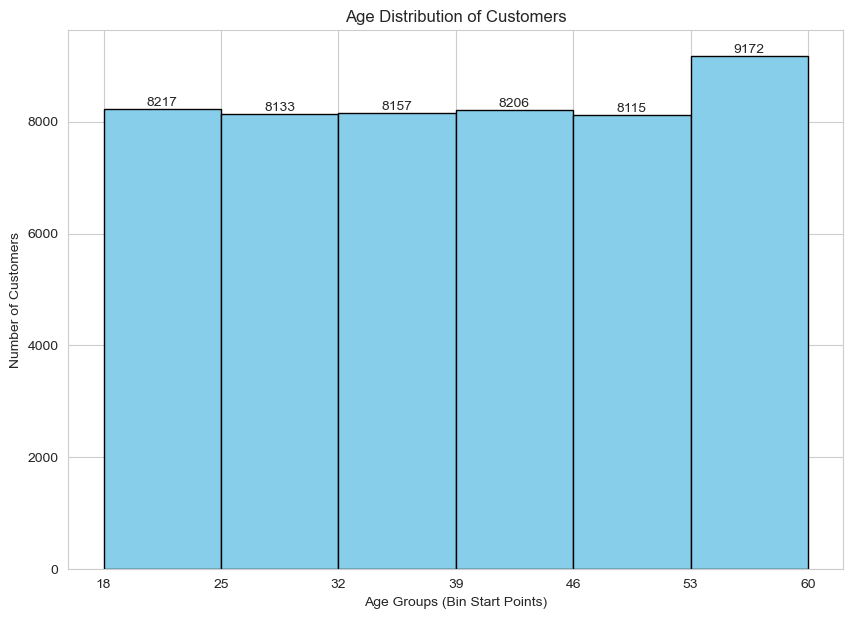

In [3483]:
#Age distribution plot
# Create figure and axis
fig, ax = plt.subplots(figsize=(10,7))

# Create histogram and store values
counts, bin_edges, patches = ax.hist(walmart_df['Age'], bins=6, color='skyblue', edgecolor='black')

def labelbar(patches, counts):
# Label each bin with count
    for patch, count in zip(patches, counts):
        bin_center = patch.get_x() + patch.get_width() / 2  
        ax.text(bin_center, count + 0.5, str(int(count)), 
            ha='center', va='bottom', fontsize=10)


# Customize plot
labelbar(patches, counts)
plt.title("Age Distribution of Customers")
plt.xlabel("Age Groups (Bin Start Points)")
plt.ylabel("Number of Customers")
plt.xticks(bin_edges)  # Ensure bin start points are visible
#plt.grid(axis='y', linestyle='--', alpha=0.7)


The majority of customers fall within the age group of <b>53 to 60.</b>

<h3>City-wise Customers </h3>

In [3486]:
customer_count=walmart_df['City'].value_counts().sort_values(ascending=False)
customer_count

City
New Michael           44
North Michael         42
Lake Michael          41
East Michael          36
South Michael         34
                      ..
North Michelleview     1
South Stevetown        1
South Jake             1
North Krystal          1
Troyshire              1
Name: count, Length: 25096, dtype: int64

In [3487]:
print("Most customers are from:",walmart_df['City'].value_counts().sort_values(ascending=False).index[0],"city")

Most customers are from: New Michael city


<h3><b>Gender Distribution</b></h3>

In [3489]:
#how many customers belong to each gender category
walmart_df['Gender'].value_counts()

Gender
Other     16751
Male      16644
Female    16605
Name: count, dtype: int64

Text(0.5, 1.0, 'Gender distribution')

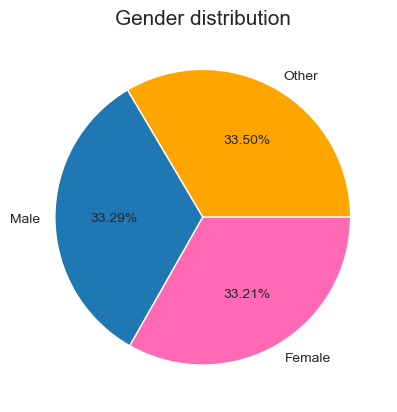

In [3490]:
#Plot the gender distribution
g=walmart_df['Gender'].value_counts()
ax=g.plot.pie(labels=g.index,autopct='%1.2f%%',colors=['#FFA500','#1f77b4', '#ff69b4'])
ax.set_ylabel('')
plt.title("Gender distribution",fontsize=15)

In [3491]:
print("Although the highest number of customers belong to the ",walmart_df['Gender'].value_counts().index[0]," category, the overall distribution is nearly the same across genders." )



Although the highest number of customers belong to the  Other  category, the overall distribution is nearly the same across genders.


<h2>Sales & Purchase Analysis</h2>

<h3><b>Most Purchased Product Name</b></h3>

In [3494]:
product_count=walmart_df['Product_Name'].value_counts()
product_count

Product_Name
Headphones    3261
T-Shirt       3206
Smartwatch    3177
Face Cream    3174
Sofa Cover    3156
Cookware      3155
Shampoo       3145
Lamp          3138
Perfume       3116
Laptop        3110
Jacket        3105
Smartphone    3094
Jeans         3067
Curtains      3043
Dress         3041
Lipstick      3012
Name: count, dtype: int64

Text(0, 0.5, 'Product Name')

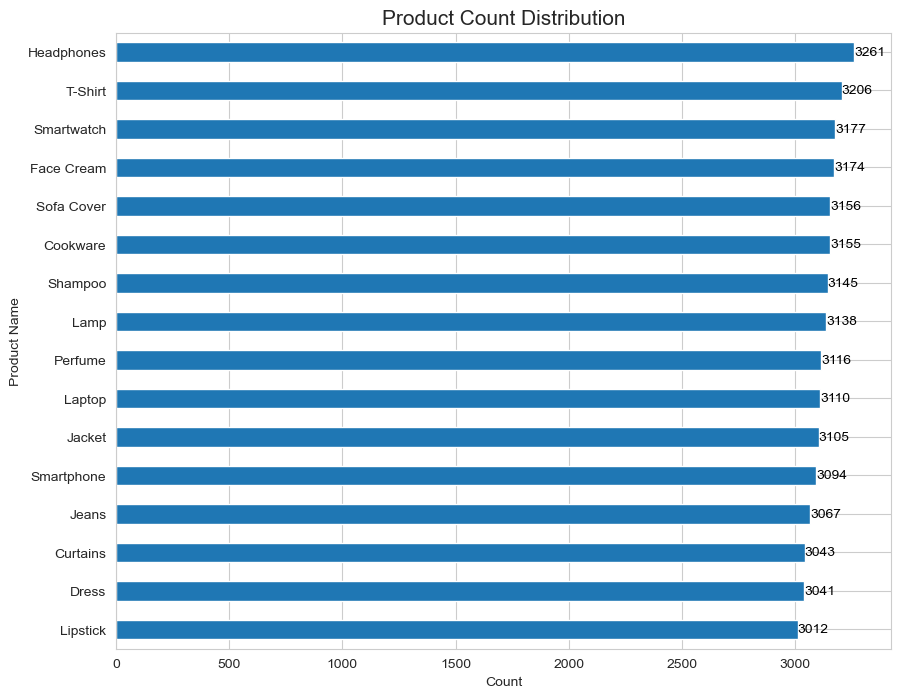

In [3495]:
#Plot the Product Count Distribution
plt.figure(figsize=(10,8))
ax=product_count.sort_values().plot(kind='barh')

# Get the patches (rectangles) from the plot
patches = ax.patches

# Get the counts (height of each bar)
counts = [patch.get_width() for patch in patches]
for patch, count in zip(patches, counts):
        # Adding the count as a label at the end of each bar
        ax.text(patch.get_width() + 0.1, patch.get_y() + patch.get_height()/2,count, va='center', ha='left', color='black')
plt.title("Product Count Distribution",fontsize=15)
plt.xlabel("Count")
plt.ylabel("Product Name")

In [3496]:
print(walmart_df['Product_Name'].value_counts().index[0],"is the most purchased product.")

Headphones is the most purchased product.


<h3>Most Purchased Product Categories</h3>

In [3498]:
# Count the categories in the 'Category' column
category_count = walmart_df['Category'].value_counts()
category_count

Category
Electronics    12642
Home           12492
Beauty         12447
Clothing       12419
Name: count, dtype: int64

Text(0, 0.5, '')

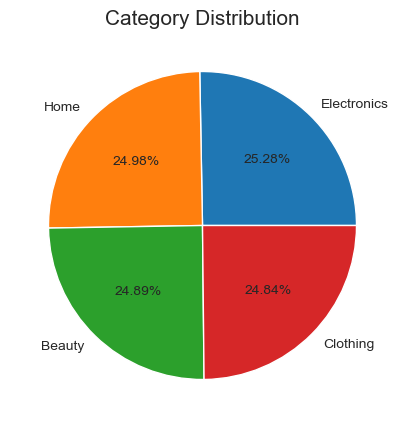

In [3499]:
# Plot the Category Distribution pie chart
plt.figure(figsize=(5, 5))  
category_count.plot.pie(autopct='%1.2f%%')

# Add a title
plt.title('Category Distribution',fontsize=15)
plt.ylabel('')

In [3500]:
print("Although most purchased product is under the ",walmart_df['Category'].value_counts().index[0],"category, the overall distribution is nearly the same across categories")



Although most purchased product is under the  Electronics category, the overall distribution is nearly the same across categories


<h3> <b>Customer Payment Method Preferences</b></h3>

In [3502]:
#Count the number of unique categories in the 'Payment_Method' column 
payment_count=walmart_df['Payment_Method'].value_counts().sort_values(ascending=False)
payment_count

Payment_Method
Debit Card          12589
Credit Card         12528
Cash on Delivery    12496
UPI                 12387
Name: count, dtype: int64

Text(0, 0.5, '')

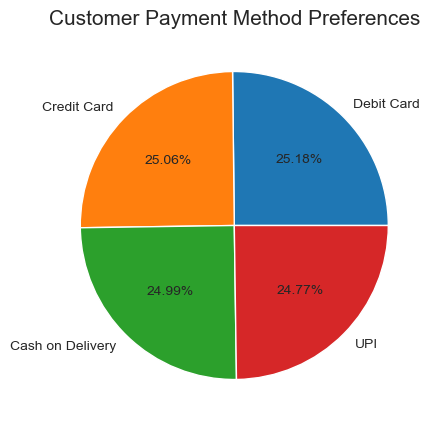

In [3503]:
#Plot the Customer Payment Method Preferences¶
plt.figure(figsize=(5,5))
payment_count.plot.pie(autopct='%1.2f%%')
plt.title('Customer Payment Method Preferences',fontsize=15)
plt.ylabel('')

In [3504]:
print("Although majority of the  customer use ",walmart_df['Payment_Method'].value_counts().sort_values(ascending=False).index[0],"payment method the overall distribution across payment methods is fairly balanced.")

Although majority of the  customer use  Debit Card payment method the overall distribution across payment methods is fairly balanced.


<h3> Spending Behavior by Gender</h3>

In [3506]:
spending_behavior=walmart_df.groupby('Gender')['Purchase_Amount'].sum().sort_values(ascending=False)
spending_behavior

Gender
Other     4287964.34
Female    4257229.08
Male      4231418.06
Name: Purchase_Amount, dtype: float64

Text(0, 0.5, '')

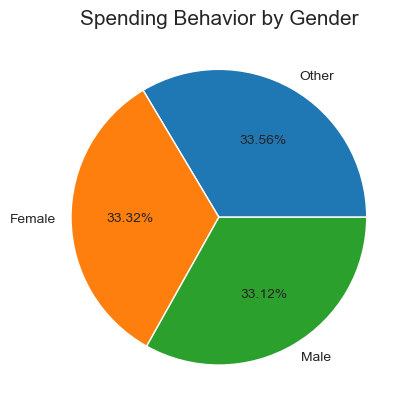

In [3507]:
#plot the Spending Behavior by Gender
spending_behavior.plot.pie(autopct='%1.2f%%')
plt.title("Spending Behavior by Gender",fontsize=15)
plt.ylabel('')

In [3508]:
print("Although",spending_behavior.index[0], "spending is the highest ,the spending behavior remains largely consistent across all.")

Although Other spending is the highest ,the spending behavior remains largely consistent across all.


<h3>Relationship Between Age & Spending</h3>

/var/folders/0n/jqw5d9gn2w9bfwy9mgh285r80000gn/T/ipykernel_48771/4073360754.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = walmart_df.groupby(['Age_Binned', 'Purchase_Amount_Binned']).size().unstack()


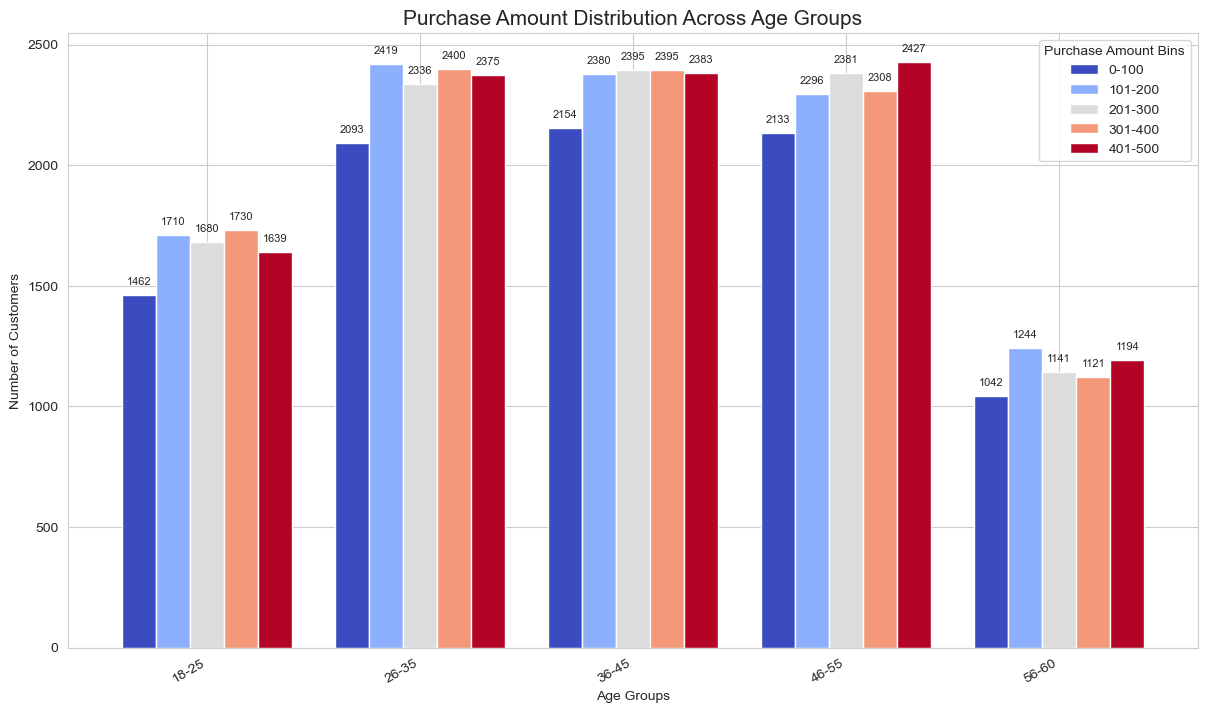

In [3510]:
#bin edges for Age
age_bins = [18, 25, 35, 45, 55, 60]  

# Age bin labels
age_labels = ['18-25', '26-35', '36-45', '46-55', '56-60']

# Bin the Age column
walmart_df['Age_Binned'] = pd.cut(walmart_df['Age'], bins=age_bins, labels=age_labels)


# Define bins for purchase_amount
Purchase_Amount_bins = [0, 100, 200, 300, 400, 500] 
Purchase_Amount_labels = ['0-100', '101-200', '201-300', '301-400', '401-500']

# Bin the purchase_amount
walmart_df['Purchase_Amount_Binned'] = pd.cut(walmart_df['Purchase_Amount'], bins=Purchase_Amount_bins, labels=Purchase_Amount_labels)

# Count occurrences of each (Age Bin, Purchase Amount Bin) pair
grouped_data = walmart_df.groupby(['Age_Binned', 'Purchase_Amount_Binned']).size().unstack()

fig, ax = plt.subplots(figsize=(12, 7))
bars = grouped_data.plot(kind='bar', ax=ax, colormap='coolwarm', width=0.8)

plt.xticks(rotation=30, ha='right')

#label the bars
for container in bars.containers:
    ax.bar_label(container, fmt='%d', fontsize=8, padding=6, label_type='edge')

plt.tight_layout()
plt.title('Purchase Amount Distribution Across Age Groups', fontsize=15)
plt.xlabel('Age Groups', fontsize=10)
plt.ylabel('Number of Customers', fontsize=10)
plt.legend(title='Purchase Amount Bins')

plt.show()

The 36–45 and 26–35 age groups have the highest purchase counts across most purchase ranges, followed by the 46–55 age group.

In contrast, the 56–60 age group consistently records the lowest purchase counts across all purchase ranges.

<h3>Category-wise Total Purchase Amount</h3>

In [3513]:
category_total_purchase_amount= walmart_df.groupby('Category')['Purchase_Amount'].sum().sort_values(ascending=False)
category_total_purchase_amount

Category
Electronics    3260688.09
Home           3195217.51
Beauty         3174727.90
Clothing       3145977.98
Name: Purchase_Amount, dtype: float64

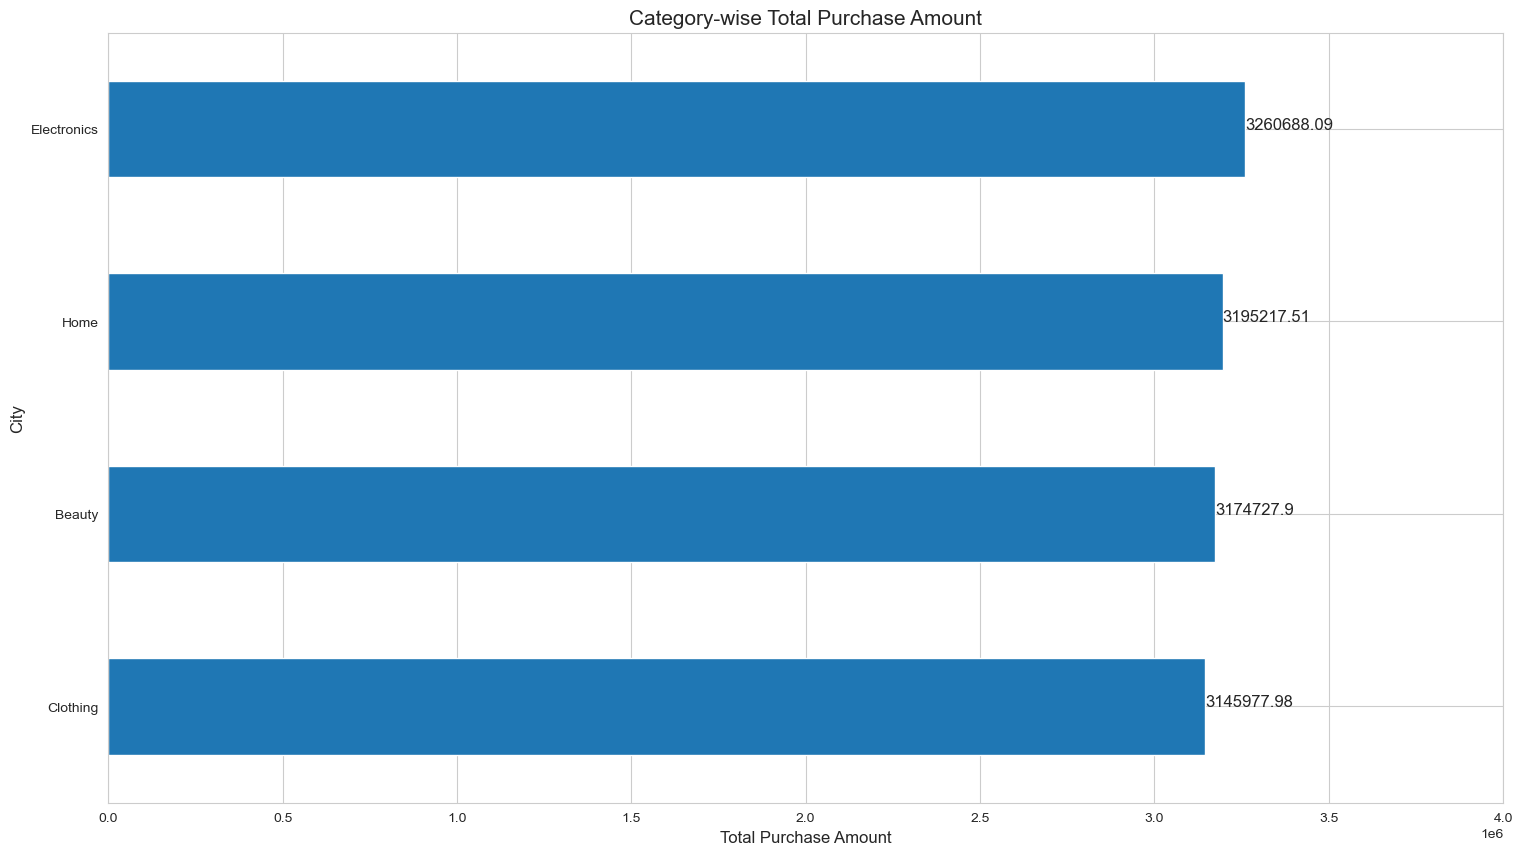

In [3514]:
#category_total_purchase_amount.plot(kind='bar')
# Plot Bar Chart
plt.figure(figsize=(18,10))
ax=category_total_purchase_amount.sort_values().plot(kind='barh')

# Get the patches (rectangles) from the plot
patches = ax.patches

# Get the counts (height of each bar)
counts = [patch.get_width() for patch in patches]

# Get the counts (height of each bar)
counts = [patch.get_width() for patch in patches]
for patch, count in zip(patches, counts):
        # Adding the count as a label at the end of each bar
        ax.text(patch.get_width() + 0.1, patch.get_y() + patch.get_height()/2,count,fontsize=12)

plt.xlim(0,4000000)
plt.title('Category-wise Total Purchase Amount', fontsize=15)
plt.xlabel('Total Purchase Amount', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.show()

In [3515]:
print("Customers tend to spend the most on ",walmart_df['Category'].value_counts().index[0],"category, though their spending is relatively similar across other categories as well")


Customers tend to spend the most on  Electronics category, though their spending is relatively similar across other categories as well


<h3> Time Series Sales Trend</h3>

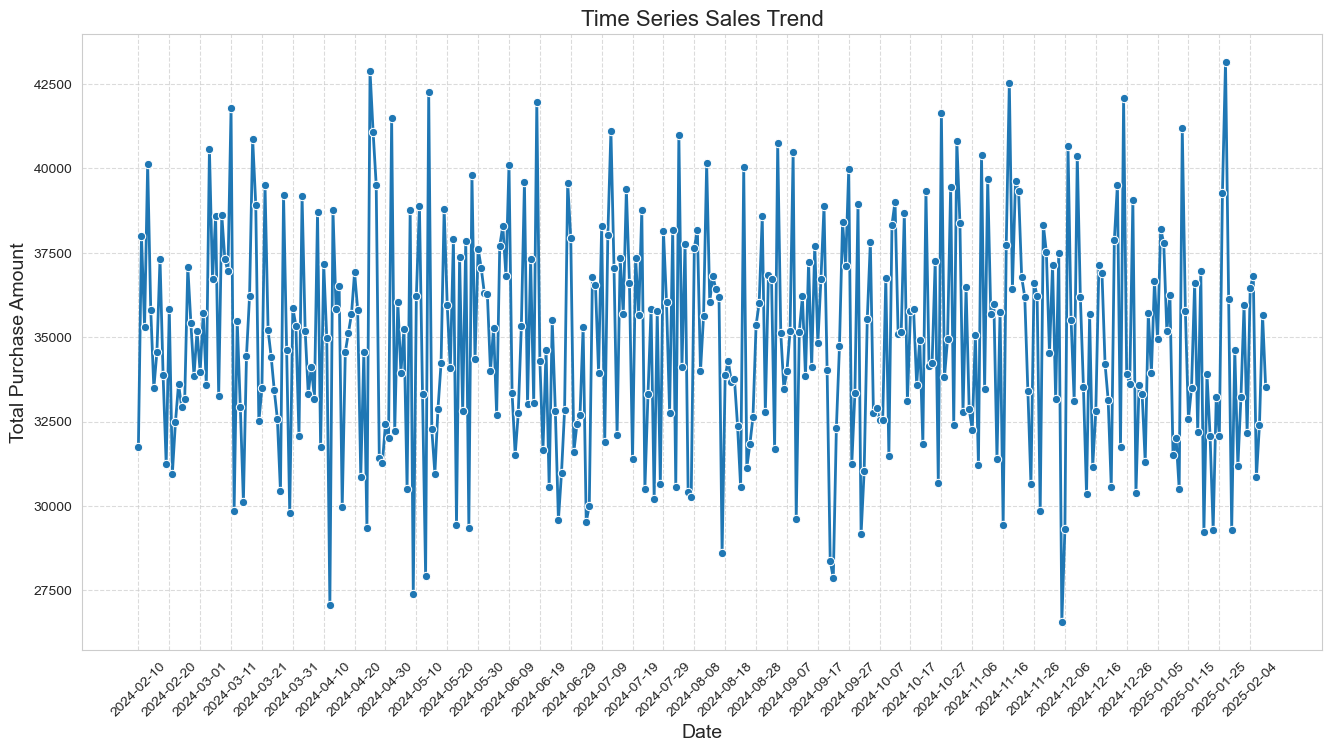

In [3517]:
walmart_df['Purchase_Date'] = pd.to_datetime(walmart_df['Purchase_Date'], errors='coerce')

df_daily = walmart_df.groupby('Purchase_Date')['Purchase_Amount'].sum().reset_index()
df_daily = df_daily.sort_values(by='Purchase_Date')  # Ensure chronological order


plt.figure(figsize=(16, 8))  # Increase figure size
sns.set_style("whitegrid")  # Improve readability

sns.lineplot(x=df_daily['Purchase_Date'], y=df_daily['Purchase_Amount'], marker='o', linewidth=2)

plt.title('Time Series Sales Trend', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Purchase Amount', fontsize=14)
plt.xticks(rotation=45)

# Set x-axis tick frequency (for better readability)
plt.xticks(ticks=df_daily['Purchase_Date'][::10])  # Adjust step as per data density

plt.grid(True, linestyle='--', alpha=0.7)  # Improve grid visibility
plt.show()

<h3>Plot Monthly Trends for Each Year</h3>

In [3519]:
# Extract year and month
walmart_df['Year'] = walmart_df['Purchase_Date'].dt.year
walmart_df['Month'] = walmart_df['Purchase_Date'].dt.month

# Group data by Year and Month
walmart_monthly = walmart_df.groupby(['Year', 'Month'])['Purchase_Amount'].sum().reset_index()

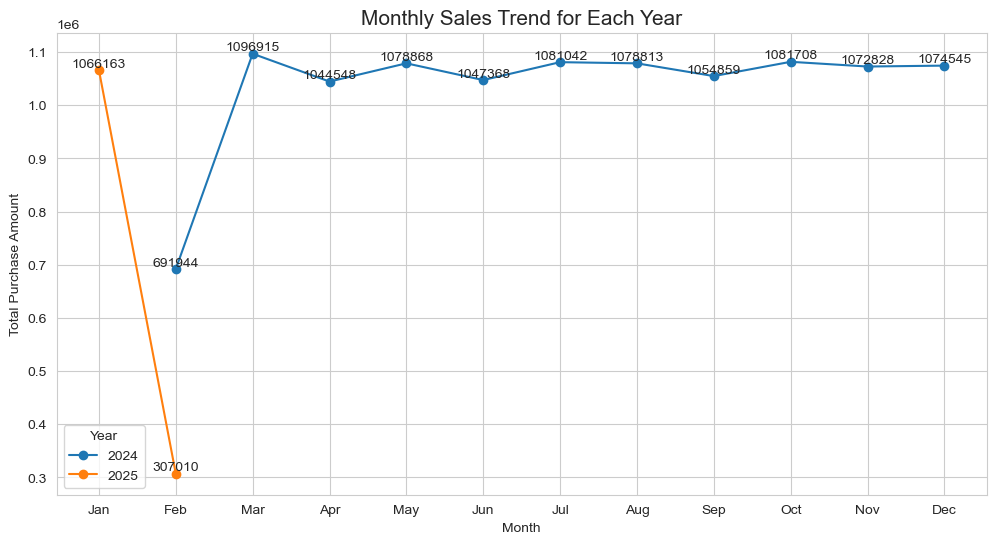

In [3520]:
plt.figure(figsize=(12, 6))

# Loop through each year and plot its trend
for year in walmart_monthly['Year'].unique():
    data = walmart_monthly[walmart_monthly['Year'] == year]
    data
    plt.plot(data['Month'], data['Purchase_Amount'], marker='o', label=str(year))

    # Add labels to each point
    for i, row in data.iterrows():
        plt.text(row['Month'], row['Purchase_Amount'], f"{row['Purchase_Amount']:.0f}", 
                 ha='center', va='bottom', fontsize=10)

# Formatting
plt.title("Monthly Sales Trend for Each Year", fontsize=15)
plt.xlabel("Month", fontsize=10)
plt.ylabel("Total Purchase Amount", fontsize=10)
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend(title="Year")


plt.show()

In 2024, March recorded the highest sales, while February had the lowest.


In 2025, January had the highest sales, and February had the lowest, with data available only for January and February, February do not represent full months.

<h3>Discount Impact on Sales</h3>

In [3523]:
walmart_df.groupby('Discount_Applied')['Purchase_Amount'].sum()

Discount_Applied
No     6391824.13
Yes    6384787.35
Name: Purchase_Amount, dtype: float64

Text(0, 0.5, 'Total Purchase Amount')

<Figure size 1000x800 with 0 Axes>

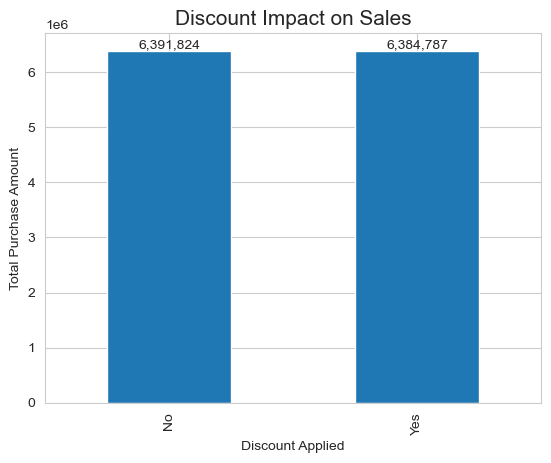

In [3524]:
#Groupby discount_applied to calculate the total purchase_amount
df_grouped = walmart_df.groupby("Discount_Applied")["Purchase_Amount"].sum().reset_index()

#plot the bar chart
plt.figure(figsize=(10, 8))
ax=df_grouped.plot(kind='bar', x="Discount_Applied", y="Purchase_Amount",legend=False)

# Add labels on top of each bar
for p in ax.patches:
    ax.annotate(f"{p.get_height():,.0f}", 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10)


plt.title("Discount Impact on Sales", fontsize=15)
plt.xlabel("Discount Applied", fontsize=10)
plt.ylabel("Total Purchase Amount", fontsize=10)

Sales total 6,384,787 with a discount applied and 6,391,824 without a discount. The difference between 6,384,787 (with a discount applied) and 6,391,824 (without a discount) is minimal, amounting to only 7,037. This suggests that the discount has a minor impact on the total sales.


<h2>Customer Feedback Analysis</h2>

<h3>Distribution of product ratings</h3>

/var/folders/0n/jqw5d9gn2w9bfwy9mgh285r80000gn/T/ipykernel_48771/909454058.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=walmart_df, x="Rating", palette="Blues_d",width=0.5)


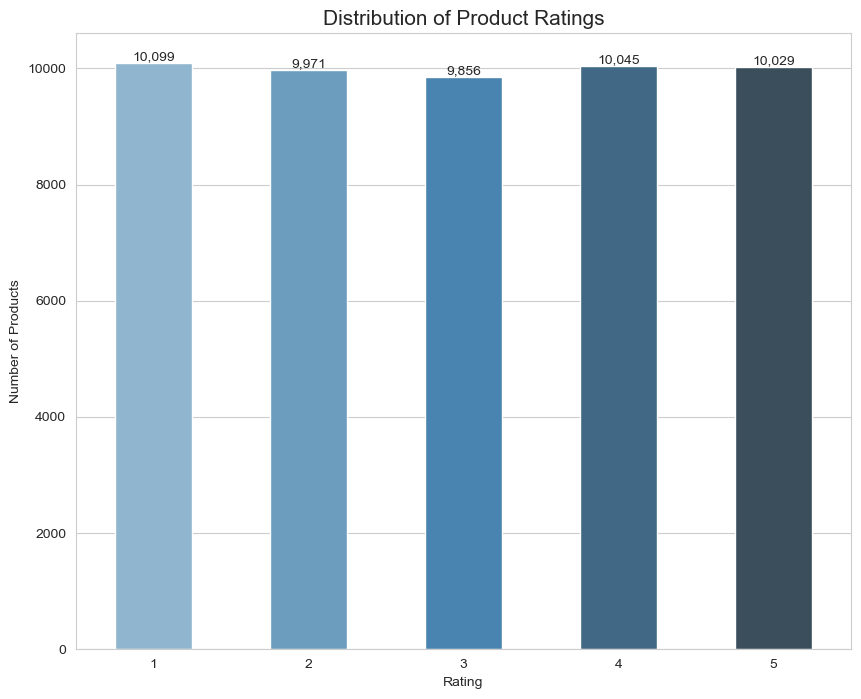

In [3528]:
#plot the bar chart for distribution of product rating
plt.figure(figsize=(10, 8))
ax=sns.countplot(data=walmart_df, x="Rating", palette="Blues_d",width=0.5)

# Add labels on top of each bar
for p in ax.patches:
    ax.annotate(f"{p.get_height():,.0f}", 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10)


# Formatting
plt.title("Distribution of Product Ratings", fontsize=15)
plt.xlabel("Rating", fontsize=10)
plt.ylabel("Number of Products", fontsize=10)
plt.show()

In [3529]:
walmart_df.groupby('Rating').size()

Rating
1    10099
2     9971
3     9856
4    10045
5    10029
dtype: int64

The ratings are fairly evenly distributed across the scale from 1 to 5.

<h3>Distribution of product ratings by Category</h3>

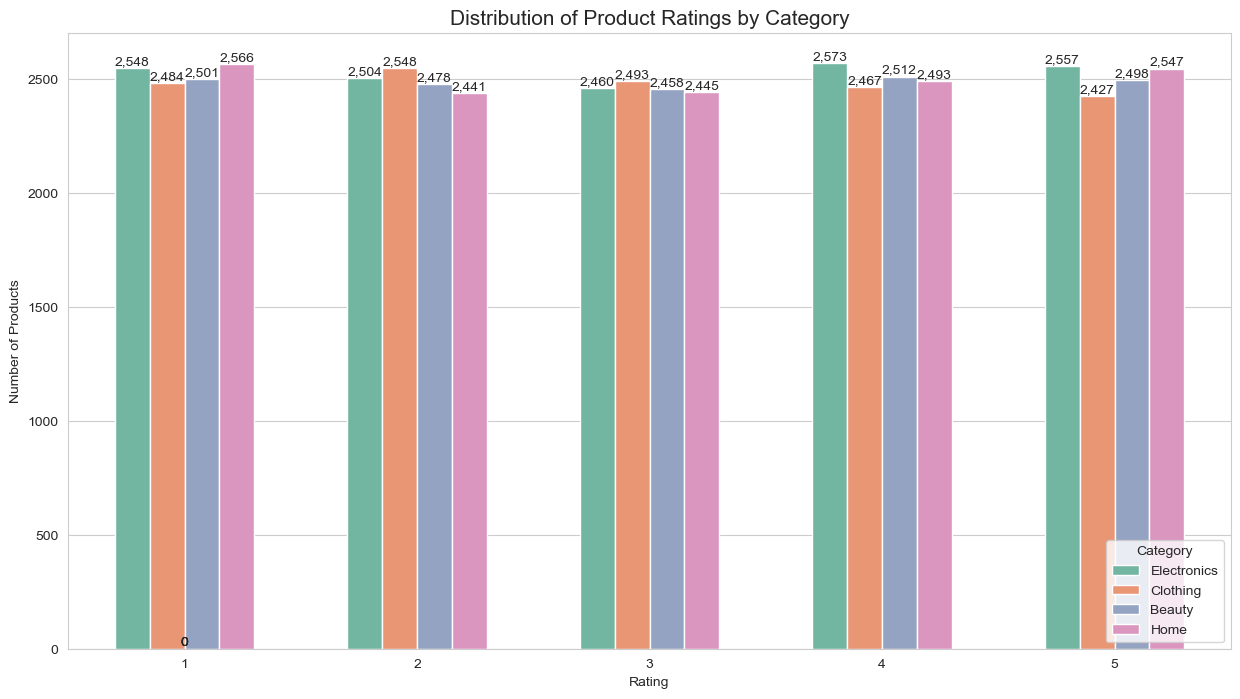

In [3532]:
plt.figure(figsize=(15, 8))

# Create a plot with 'Category' as hue to distinguish between categories
ax = sns.countplot(data=walmart_df, x="Rating", hue="Category", palette="Set2", width=0.6)

# Add labels on top of each bar
for p in ax.patches:
    ax.annotate(f"{p.get_height():,.0f}", 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10)

# Formatting
plt.title("Distribution of Product Ratings by Category", fontsize=15)
plt.xlabel("Rating", fontsize=10)
plt.ylabel("Number of Products", fontsize=10)
plt.legend(title="Category")
plt.show()

The ratings are fairly consistent across the scale from 1 to 5 across different categories.

<h3>Repeat Customer vs. New Customer Count</h3>

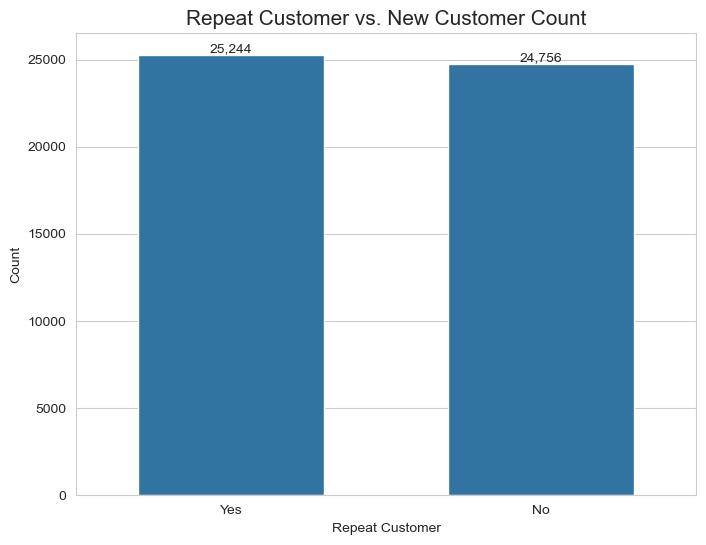

In [3535]:
plt.figure(figsize=(8,6))
ax=sns.countplot(data=walmart_df,x='Repeat_Customer', width=0.6)
# Add labels on top of each bar
for p in ax.patches:
    ax.annotate(f"{p.get_height():,.0f}", 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10)


# Formatting
plt.title("Repeat Customer vs. New Customer Count", fontsize=15)
plt.xlabel("Repeat Customer", fontsize=10)
plt.ylabel("Count", fontsize=10)
plt.show()

The number of <b>Repeat Customers</b> slightly higher than the number of <b>New customers</b>, indicating that customers are coming back, which reflects a positive trend in customer loyalty.

<h3>Spending Behavior of Repeat vs. New Customers</h3>

In [3538]:
#summing up purchase amount for repeat and new customer

repeat_df=walmart_df.groupby('Repeat_Customer')['Purchase_Amount'].sum().reset_index()
repeat_df

,Repeat_Customer,Purchase_Amount
0,No,6313865.62
1,Yes,6462745.86


<Figure size 800x600 with 0 Axes>

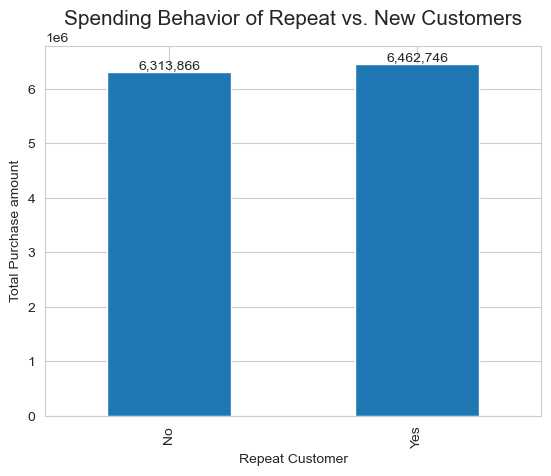

In [3539]:
plt.figure(figsize=(8,6))
ax=repeat_df.plot(kind='bar',x='Repeat_Customer',y='Purchase_Amount',legend=False)

# Add labels on top of each bar
for p in ax.patches:
    ax.annotate(f"{p.get_height():,.0f}", 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10)


# Formatting
plt.title("Spending Behavior of Repeat vs. New Customers", fontsize=15)
plt.xlabel("Repeat Customer", fontsize=10)
plt.ylabel("Total Purchase amount", fontsize=10)
plt.show()

Repeat customers are spending slightly more (6,462,746) than new customers (6,313,865.62). While repeat customers contribute a bit more, new customers are still making a significant contribution to the overall revenue.

<h3>Customer Segmentation:  
    
    
Heatmap of Count Distribution Across Age Bin, Purchase Amount Bin, and Repeat vs. New Customers.</h3>

/var/folders/0n/jqw5d9gn2w9bfwy9mgh285r80000gn/T/ipykernel_48771/2168283416.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data_h = walmart_df.groupby(['Age_Binned', 'Purchase_Amount_Binned', 'Repeat_Customer']).size().reset_index(name='Count')
/var/folders/0n/jqw5d9gn2w9bfwy9mgh285r80000gn/T/ipykernel_48771/2168283416.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_data_h = grouped_data_h.pivot_table(index='Age_Binned',


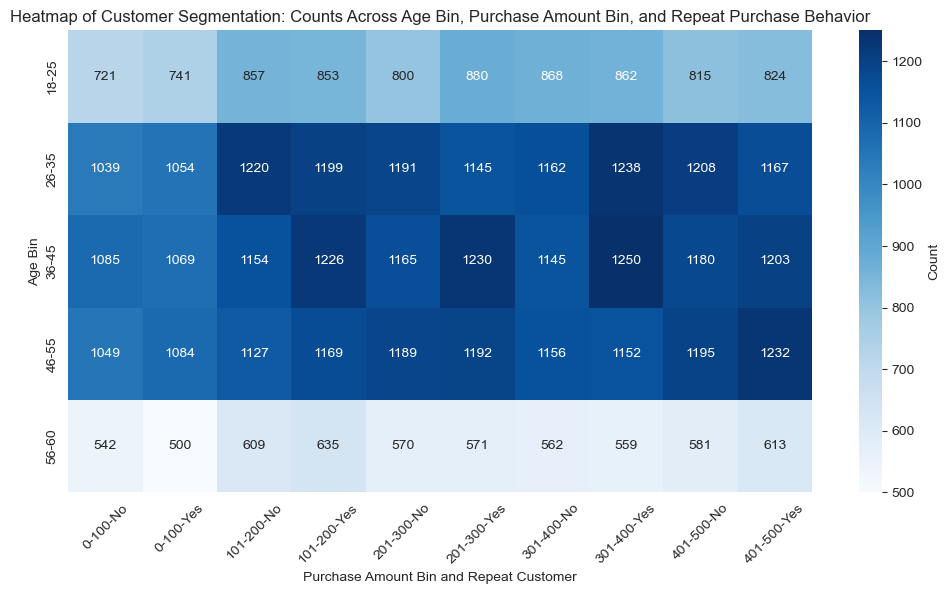

In [3542]:
# Grouping data based on Age_Binned, Purchase_Amount_Binned, and Repeat_Customer
grouped_data_h = walmart_df.groupby(['Age_Binned', 'Purchase_Amount_Binned', 'Repeat_Customer']).size().reset_index(name='Count')

# Pivoting the data to create a matrix for the heatmap
pivot_data_h = grouped_data_h.pivot_table(index='Age_Binned', 
                                      columns=['Purchase_Amount_Binned', 'Repeat_Customer'], 
                                      values='Count', 
                                      fill_value=0)

# Plotting the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_data_h, annot=True, cmap='Blues', cbar_kws={'label': 'Count'}, fmt='.0f')

# Customizing the plot
plt.title('Heatmap of Customer Segmentation: Counts Across Age Bin, Purchase Amount Bin, and Repeat Purchase Behavior')
plt.xlabel('Purchase Amount Bin and Repeat Customer')
plt.ylabel('Age Bin')
plt.xticks(rotation=45)
plt.show()

In the Heatmap,color intensity represents the number of customers.
Customers in the 46-55 36–45 and 26–35 age groups have the highest purchase counts across most purchase ranges,same trend observed both for Repeat customers and New customers.
In contrast, the 56–60 age group consistently records the lowest purchase counts across all purchase ranges,following the same pattern for both Repeat and New Customers.


<h2>Conclusion After the Analysis:</h2>

<h4><b>Customer Demographics:</b></h4>

*The majority of customers fall within the <b>53–60 age group</b>, with the highest concentration coming from <b>New Michael City</b>.
    
*While the <b>Other</b> category has the highest number of customers, the overall distribution remains fairly balanced across genders.




<h4><b>Sales & Purchase Analysis:</b></h4>

*<b>Headphones</b> is the most purchased product.

*While the <b>Electronics</b> category has the highest number of purchases, the overall distribution remains fairly balanced across other categories. Customers spend the most on <b>Electronics</b>, but their spending is relatively similar across other categories as well.
    
    
*Although majority of the  customer use  <b>Debit Card</b> payment method the overall distribution across payment methods is fairly        balanced.
    
*Although <b>Other</b> spending is the highest ,the spending behavior remains largely consistent across all gender.
    
    
*In 2024, <b>sales peaked in March</b>, while <b>February saw the lowest sales</b>.    
In 2025, with <b>January recording the highest sales</b> and <b>February the lowest</b>. However, since data for 2025 is only available for January      and February, the February figures do not represent a full month.
    
*Discount has a <b>minimal effect</b> on the total sales.
    
*The <b>36–45 and 26–35 age groups have the highest purchase counts across most purchase ranges</b>, followed by the 46–55 age group.      
In contrast, the <b>56–60 age group consistently records the lowest purchase</b> counts across all purchase ranges.




<h4><b>Customer Feedback Analysis:</b></h4>

*The ratings are fairly evenly distributed across the scale from 1 to 5 and remain consistent across different categories.




*The number of <b>Repeat Customers is slightly higher than New Customers</b>, highlighting strong customer retention and a positive trend in loyalty. While <b>Repeat Customers are spending slightly more</b>, New Customers still make a significant contribution to overall revenue generation.


<h4><b>Customer Segmentation:</b> </h4> 

The <b>46–55, 36–45, and 26–35 age groups demonstrate the highest purchase activity across most purchase ranges</b>, exhibiting a similar trend for both Repeat and New Customers.
On the other hand, the <b>56–60 age group consistently shows the lowest purchase</b> counts across all purchase ranges, following the same pattern for both customer segments.
